# Setting
### Finding data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dask.diagnostics import ProgressBar
import intake
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [2]:
col.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,hfls,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,hus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,zg,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,prw,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
511420,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,sfcWind,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
511421,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,Amon,uas,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
511422,CMIP,CMCC,CMCC-CM2-HR4,abrupt-4xCO2,r1i1p1f1,day,rlut,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/abrupt...,NaN,20210624
511423,ScenarioMIP,AS-RCEC,TaiESM1,ssp585,r1i1p1f1,day,tasmin,gn,gs://cmip6/CMIP6/ScenarioMIP/AS-RCEC/TaiESM1/s...,NaN,20210721


In [3]:
np.sort(col.df['source_id'].unique())

array(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'AWI-ESM-1-1-LR',
       'BCC-CSM2-HR', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0',
       'CAS-ESM2-0', 'CESM1-1-CAM5-CMIP5', 'CESM1-WACCM-SC', 'CESM2',
       'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CIESM',
       'CMCC-CM2-HR4', 'CMCC-CM2-SR5', 'CMCC-CM2-VHR4', 'CMCC-ESM2',
       'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'CanESM5',
       'CanESM5-CanOE', 'E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA',
       'EC-Earth3', 'EC-Earth3-AerChem', 'EC-Earth3-CC', 'EC-Earth3-LR',
       'EC-Earth3-Veg', 'EC-Earth3-Veg-LR', 'EC-Earth3P', 'EC-Earth3P-HR',
       'EC-Earth3P-VHR', 'ECMWF-IFS-HR', 'ECMWF-IFS-LR', 'FGOALS-f3-H',
       'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'GFDL-AM4', 'GFDL-CM4',
       'GFDL-CM4C192', 'GFDL-ESM2M', 'GFDL-ESM4', 'GFDL-OM4p5B',
       'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'GISS-E2-2-G',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-LM',
       'HadGEM3-GC31-MM', 'IITM-ESM', 'I

### Choosing datasets

In [90]:
# choose datasets by experiment_id & variable_id
# e.g. when you want the datasets with experiment_id == 'ssp585' & 'historical' and variable_id == 'no3os' & 'tos'

# all source_id with experiment_id == 'ssp585' or 'historical'
elist1 = col.df[col.df.experiment_id == 'ssp585'].source_id.unique()
elist2 = col.df[col.df.experiment_id == 'historical'].source_id.unique()

#elist = set(elist1).intersection(elist2)

# all source_id with variable_id == 'no3os' or 'tos'
vlist1 = col.df[col.df.variable_id == 'no3os'].source_id.unique()
vlist2 = col.df[col.df.variable_id == 'tos'].source_id.unique()

vlist = set(vlist1).intersection(vlist2)

mlist = col.df[col.df.member_id == 'r1i1p1f1'].source_id.unique()

model_list = set(elist).intersection(vlist).intersection(mlist)
model_list

{'ACCESS-ESM1-5',
 'CESM2',
 'CESM2-WACCM',
 'CanESM5',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'IPSL-CM6A-LR',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'NorESM2-LM',
 'NorESM2-MM'}

### Creating a subcollection


As an example, choose some models

In [13]:
# adapted from from Julius's notebook
# create a subcollection with certain search criteria

models = ['CanESM5','NorESM2-LM']
cat = col.search(
    variable_id=['tos', 'no3os'], # SST & surface dissolved nitrate concentration
    source_id=models,
    grid_label='gn',
    table_id='Omon',
    experiment_id=['historical', 'ssp585'],
    member_id = ['r1i1p1f1','r2i1p1f1']#, 'r2i1p2f1', 'r3i1p2f1'] # load only two members for demo purposes
)

# load all datasets into a python dictionary
ddict = cat.to_dataset_dict(
    zarr_kwargs={'consolidated':True, 'use_cftime':True}, # recommended for faster reading and better time handling
    storage_options={'token': 'anon'}, # needed to access the public CMIP6 data on google
    aggregate=False,
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


Looing into the subselected dataset

In [22]:
# first dataset on ddict list
ds_a = ddict['CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.Omon.no3os.gn.gs://cmip6/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/no3os/gn/v20191108/.nan.20191108']
ds_a

<xarray.Dataset>
Dimensions:             (i: 360, j: 385, time: 1980, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
  * j                   (j) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384 385
    latitude            (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(385, 360), meta=np.ndarray>
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    no3os               (time, j, i) float32 dask.array<chunksize=(173, 385, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(385, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(385, 360, 4), meta=np.ndarray>
Attributes: (12/54)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1600-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     430335.0
    ...                        ...
    variable_id:               no3os
    variant_label:             r1i1p1f1
    netcdf_tracking_ids:       hdl:21.14100/b550fc86-72a2-4bc3-a8a7-1e2286301...
    version_id:                v20191108
    intake_esm_varname:        None
    intake_esm_dataset_key:    CMIP.NCC.NorESM2-LM.historical.r1i1p1f1.Omon.n...

In [21]:
# second dataset on ddict list
ds_b = ddict['CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon.no3os.gn.gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Omon/no3os/gn/v20190429/.nan.20190429']
ds_b

<xarray.Dataset>
Dimensions:             (i: 360, j: 291, time: 1980, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
  * time                (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:0...
    time_bnds           (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    no3os               (time, j, i) float32 dask.array<chunksize=(210, 291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
Attributes: (12/58)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variant_label:               r1i1p1f1
    version:                     v20190429
    netcdf_tracking_ids:         hdl:21.14100/1e2686dc-0343-474e-88a6-8ee95aa...
    version_id:                  v20190429
    intake_esm_varname:          None
    intake_esm_dataset_key:      CMIP.CCCma.CanESM5.historical.r1i1p1f1.Omon....

Checking the dimensions

In [23]:
print(ds_a.dims)
print(ds_b.dims)

Frozen({'i': 360, 'j': 385, 'time': 1980, 'bnds': 2, 'vertices': 4})
Frozen({'i': 360, 'j': 291, 'time': 1980, 'bnds': 2, 'vertices': 4})


In [24]:
# copied from Julius's notebook
from cmip6_preprocessing.preprocessing import combined_preprocessing
print(combined_preprocessing(ds_a).dims)
print(combined_preprocessing(ds_b).dims)

Frozen({'time': 1980, 'y': 385, 'x': 360, 'bnds': 2, 'vertex': 4})
Frozen({'time': 1980, 'y': 291, 'x': 360, 'bnds': 2, 'vertex': 4})


Note that CanESM5 and NorESM2 have different number of points in the y-direction. The ranges are given below:
1. NorESM2 has longitude $\in$(-80, 62)
2. CanESM5 has longitude $\in$(-78, 50)

In [35]:
# copied from Julius's notebook
# load all datasets into a python dictionary
ddict = cat.to_dataset_dict(
    zarr_kwargs={'consolidated':True, 'use_cftime':True}, # recommended for faster reading and better time handling
    storage_options={'token': 'anon'}, # needed to access the public CMIP6 data on google
    aggregate=False,
    preprocess=combined_preprocessing, # this applies the preprocessing to all datasets
)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


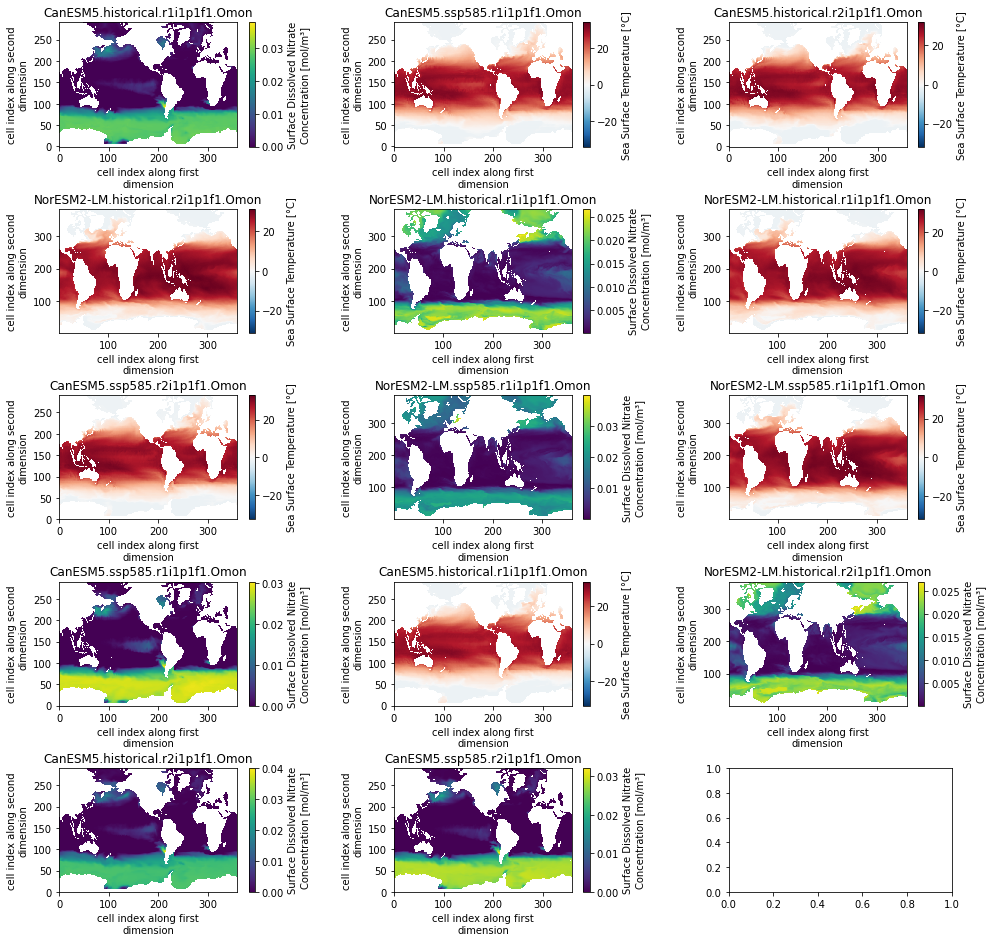

In [48]:
# copied from Julius's notebook
# quick example of how to loop over several models
from cmip6_preprocessing.utils import cmip6_dataset_id
fig, axarr = plt.subplots(ncols = 3, nrows = 5, figsize = (16,16))
for ax, (name, ds) in zip(axarr.flat, ddict.items()):
    # select the first time step
    ds = ds.isel(time=0)
    # select the datavariable
    da = ds[ds.variable_id]
    # plot
    
    da.plot(ax=ax)
    ax.set_title('.'.join(cmip6_dataset_id(ds).split('.')[2:6]))
    
fig.subplots_adjust(hspace=0.5, wspace=0.5)

### Grouping the dataset (by source_id??)

In [103]:
from cmip6_preprocessing.postprocessing import merge_variables, concat_members, concat_experiments
ddict_combined_a = merge_variables(ddict)

In [174]:
for key in ddict_combined_a:
    ddict[str(key)]

KeyError: 'CanESM5.gn.historical.Omon.r1i1p1f1'

In [171]:
ddict['CanESM5.gn.historical.Omon.r1i1p1f1']

KeyError: 'CanESM5.gn.historical.Omon.r1i1p1f1'

In [169]:
ddict_combined_a

{'CanESM5.gn.historical.Omon.r1i1p1f1': <xarray.Dataset>
 Dimensions:        (time: 1980, y: 291, x: 360, bnds: 2, vertex: 4)
 Coordinates:
   * x              (x) int32 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
   * y              (y) int32 0 1 2 3 4 5 6 7 ... 283 284 285 286 287 288 289 290
     lat            (y, x) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
     lon            (y, x) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
   * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
     time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
     lat_verticies  (y, x, vertex) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
     lon_verticies  (y, x, vertex) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
     lon_bounds     (bnds, y, x) float64 dask.array<chunksize=(1, 291, 360), meta=np.ndarray>
     lat_bounds     (bnds, y, x) float64 dask.array<chunksize=(1, 291, 36

In [15]:
# modified from the original ohw_21_cmip6_pp_tutorial notebook due to experiment_id & variable_id causing errors
def maybe_remove_attrs(ds, attr):
    if attr in ds.attrs.keys():
        del ds.attrs[attr]
    return ds
# remove the `variable_id` attr manually
ddict_combined_aa = {k:maybe_remove_attrs(ds, 'variable_id') for k,ds in ddict_combined_a.items()}
ddict_combined_b = concat_experiments(ddict_combined_aa)
# same thing for experiment_id
ddict_combined_bb = {k:maybe_remove_attrs(ds, 'experiment_id') for k,ds in ddict_combined_b.items()}
ddict_combined = concat_members(ddict_combined_bb)

/srv/conda/lib/python3.9/site-packages/cmip6_preprocessing/postprocessing.py:113: UserWarning: Match attributes ['variable_id'] not found in any of the datasets.         This can happen when several combination functions are used.
  warnings.warn(
/srv/conda/lib/python3.9/site-packages/cmip6_preprocessing/postprocessing.py:113: UserWarning: Match attributes ['experiment_id', 'variable_id'] not found in any of the datasets.         This can happen when several combination functions are used.
  warnings.warn(


Dictionary keys

In [175]:
ddict_combined.keys()

NameError: name 'ddict_combined' is not defined

In [28]:
ddict_combined['GISS-E2-1-G.gn.Omon']

<xarray.Dataset>
Dimensions:        (member_id: 2, time: 1980, y: 90, x: 144, bnds: 2, vertex: 4)
Coordinates:
  * y              (y) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
    lat_bounds     (y, bnds, x) float64 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0
  * x              (x) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    lon_bounds     (x, bnds, y) float64 360.0 360.0 360.0 ... 360.0 360.0 360.0
  * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds    (time, bnds) object 1850-01-01 00:00:00 ... 2015-01-01 00:...
    lon            (x, y) float64 1.25 1.25 1.25 1.25 ... 358.8 358.8 358.8
    lat            (x, y) float64 -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
    lon_verticies  (vertex, x, y) float64 360.0 360.0 360.0 ... 360.0 360.0
    lat_verticies  (vertex, x, y) float64 -90.0 -88.0 -86.0 ... 84.0 86.0 88.0
Dimensions without coordinates: member_id, bnds, vertex
Data variables:
    tos            (member_id, time, y, x) float32 dask.array<chunksize=(1, 963, 90, 144), meta=np.ndarray>
Attributes: (12/41)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    cmor_version:           3.3.2
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    ...                     ...
    table_id:               Omon
    table_info:             Creation Date:(21 March 2018) MD5:652eaa766045a77...
    title:                  GISS-E2-1-G output prepared for CMIP6
    status:                 2019-11-10;created;by nhn2@columbia.edu
    intake_esm_varname:     None
    original_key:           GISS-E2-1-G.gn.Omon.r3i1p1f1

In [29]:
ddict_combined['CanESM5.gn.Omon']

,Array,Chunk
Bytes,4.70 GiB,85.92 MiB
Shape,"(4, 3012, 291, 360)","(1, 215, 291, 360)"
Count,274 Tasks,60 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,4.70 GiB,83.92 MiB
Shape,"(4, 3012, 291, 360)","(1, 210, 291, 360)"
Count,372 Tasks,76 Chunks
Type,float32,numpy.ndarray


It seems that "CanESM5.gn.Omon" is the only dataset with tos & no3os data although we chose (at least aimed so) those datasets with tos & no3os data. This caused some errors when plotting a map in the next section.

# Masking the Arabian Sea

In [18]:
import regionmask
from cmip6_preprocessing.regionmask import merged_mask
# load ocean basin data
basins = regionmask.defined_regions.natural_earth.ocean_basins_50

In [20]:
ds

<xarray.Dataset>
Dimensions:        (member_id: 2, y: 576, x: 720, vertex: 4, bnds: 2)
Coordinates:
  * x              (x) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * y              (y) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
    lat            (y, x) float32 -77.91 -77.91 -77.91 ... 65.39 65.18 64.97
    lat_verticies  (y, x, vertex) float32 -78.0 -77.82 -77.82 ... 64.87 64.87
    lon            (y, x) float32 60.25 60.75 61.25 61.75 ... 59.99 59.99 60.0
    lon_verticies  (y, x, vertex) float32 60.0 60.0 60.5 60.5 ... 60.0 60.0 60.0
    time           object 1850-01-16 12:00:00
    time_bounds    (bnds) object 1850-01-01 00:00:00 1850-02-01 00:00:00
    lon_bounds     (bnds, y, x) float32 60.0 60.5 61.0 61.5 ... 59.99 60.0 60.0
    lat_bounds     (bnds, y, x) float32 -78.0 -78.0 -78.0 ... 65.39 65.18 64.97
Dimensions without coordinates: member_id, vertex, bnds
Data variables:
    tos            (member_id, y, x) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
Attributes: (12/40)
    Conventions:           CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:           CMIP
    branch_method:         standard
    branch_time_in_child:  0.0
    comment:               <null ref>
    contact:               gfdl.climate.model.info@noaa.gov
    ...                    ...
    table_id:              Omon
    title:                 NOAA GFDL GFDL-ESM4 model output prepared for CMIP...
    variant_info:          N/A
    version_id:            v20180701
    intake_esm_varname:    None
    original_key:          GFDL-ESM4.gn.Omon.r3i1p1f1

/srv/conda/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


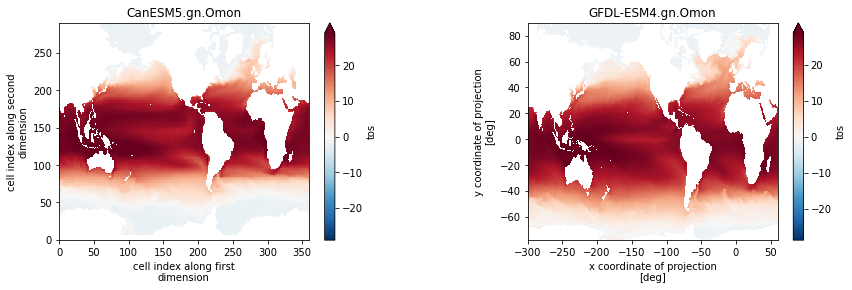

In [22]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=[14,4])
for ax, (name, ds) in zip(axarr.flat, ddict_combined.items()):
    # show just the first time step
    ds = ds.isel(time=0)
    
    # average all members
    if 'member_id' in ds.dims:
        ds = ds.mean('member_id')
    ds.tos.plot(ax=ax, robust=True)
    ax.set_title(name)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

/srv/conda/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/srv/conda/lib/python3.9/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


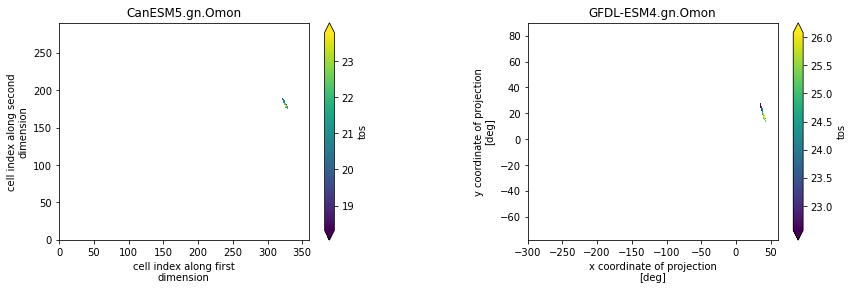

In [32]:
fig, axarr = plt.subplots(ncols=2, nrows=1, figsize=[14,4])
for ax, (name, ds) in zip(axarr.flat, ddict_combined.items()):
    # show just the first time step
    ds = ds.isel(time=0)

    # average all members
    if 'member_id' in ds.dims:
        ds = ds.mean('member_id')
        
    # mask out the indian ocean
    mask = merged_mask(basins, ds)
    
    ds_masked = ds.where(mask == 10) # Does anyone know which number the Arabian sea? (thought it's #53 was it isn't quite working..., maybe #10?)
    
    ds_masked.tos.plot(ax=ax, robust=True)
    ax.set_title(name)
fig.subplots_adjust(hspace=0.5, wspace=0.5)